# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Cargar CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Ver la forma de los datos
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


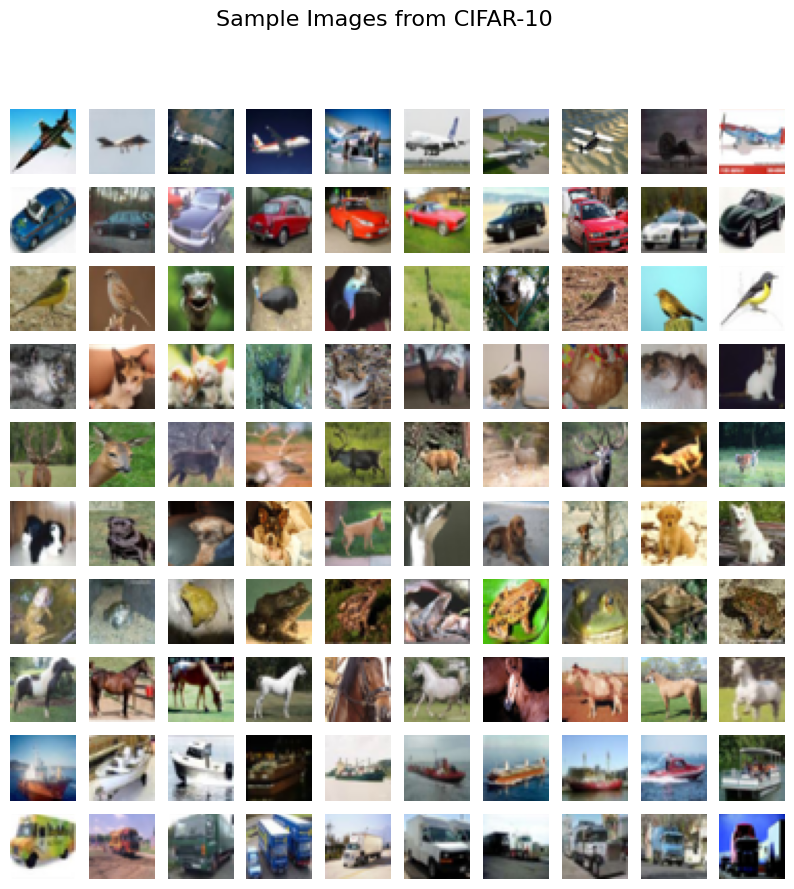

x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 10)


In [3]:
# Definir las clases de CIFAR-10
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

# Crear una figura con 10 filas y 10 columnas
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.suptitle("Sample Images from CIFAR-10", fontsize=16)

# Dibujar 10 imágenes aleatorias de cada clase
for i in range(10):  # Para cada clase
    indices = np.where(y_train.flatten() == i)[0]  # Obtener índices de la clase i
    random_indices = np.random.choice(indices, 10, replace=False)  # Elegir 10 imágenes al azar

    for j, idx in enumerate(random_indices):  # Iterar sobre imágenes
        ax = axes[i, j]
        ax.imshow(x_train[idx])
        ax.axis("off")
        if j == 0:
            ax.set_ylabel(class_names[i], fontsize=12)

plt.show()

# Normalizar imágenes (convertir valores de 0-255 a 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convertir etiquetas a formato one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Ver forma de los datos después de normalizar
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Clear previous session (optional, useful for Colab)
tf.keras.backend.clear_session()

# Defining the CNN Model
model = Sequential([
    # First convolutional layer with 32 filters, kernel size 3x3, ReLU activation
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),  # Max pooling to reduce dimensionality

    # Flatten the features for the classifier
    Flatten(),

    # Dense layer with 100 neurons
    Dense(100, activation='relu'),

    # Output layer with 10 neurons (softmax for classification)
    Dense(10, activation='softmax')
])

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the model with categorical crossentropy loss, SGD optimizer, and accuracy metric
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [6]:
# Train the model for 50 epochs with batch size 512
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.2102 - loss: 2.1488 - val_accuracy: 0.3484 - val_loss: 1.8654
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3678 - loss: 1.8116 - val_accuracy: 0.4077 - val_loss: 1.6909
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4160 - loss: 1.6730 - val_accuracy: 0.4428 - val_loss: 1.5650
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4603 - loss: 1.5232 - val_accuracy: 0.4855 - val_loss: 1.4424
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4999 - loss: 1.4227 - val_accuracy: 0.4955 - val_loss: 1.4027
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5323 - loss: 1.3299 - val_accuracy: 0.5340 - val_loss: 1.3122
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5597 - loss: 1.2621 - val_accuracy: 0.5538 - val_loss: 1.2506
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5787 - loss: 1.2022 - val_accuracy: 0.5748 - v

*   Plot the cross entropy loss curve and the accuracy curve

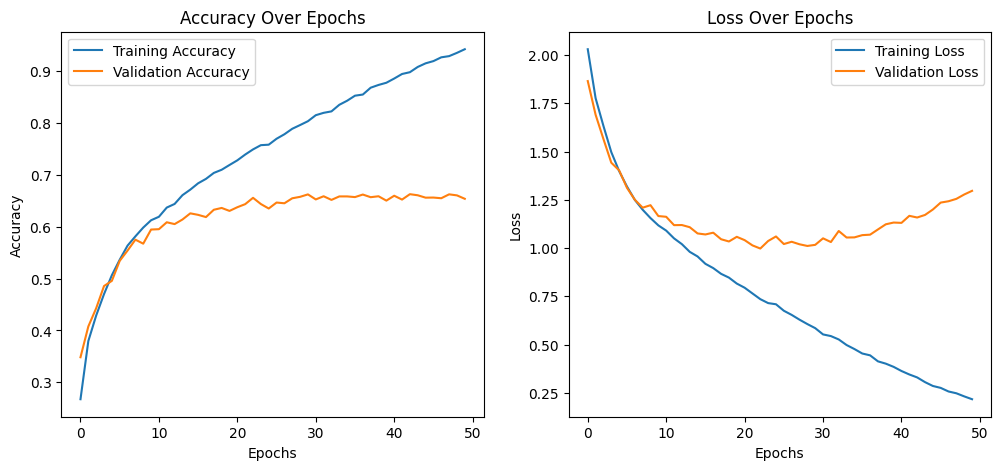

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Clear previous session (optional, useful for Colab)
tf.keras.backend.clear_session()

# Defining the VGG-like model
model_vgg = Sequential([
    # First convolutional block: 2 convolutional layers + max pooling
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten the features
    Flatten(),

    # Fully connected layer with 128 neurons
    Dense(128, activation='relu'),

    # Output layer with 10 neurons (softmax for classification)
    Dense(10, activation='softmax')
])

# Model Summary
model_vgg.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the VGG-like model
model_vgg.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
# Train the VGG-like model
history_vgg = model_vgg.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.1950 - loss: 2.1771 - val_accuracy: 0.3704 - val_loss: 1.7836
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3928 - loss: 1.7258 - val_accuracy: 0.4413 - val_loss: 1.5761
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4577 - loss: 1.5304 - val_accuracy: 0.4906 - val_loss: 1.4186
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5052 - loss: 1.3892 - val_accuracy: 0.5289 - val_loss: 1.3422
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5481 - loss: 1.2816 - val_accuracy: 0.5640 - val_loss: 1.2312
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5875 - loss: 1.1804 - val_accuracy: 0.5687 - val_loss: 1.2206
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6071 - loss: 1.1187 - val_accuracy: 0.5803 - val_loss: 1.1844
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6259 - loss: 1.0656 - val_accuracy: 0.6054 - 

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


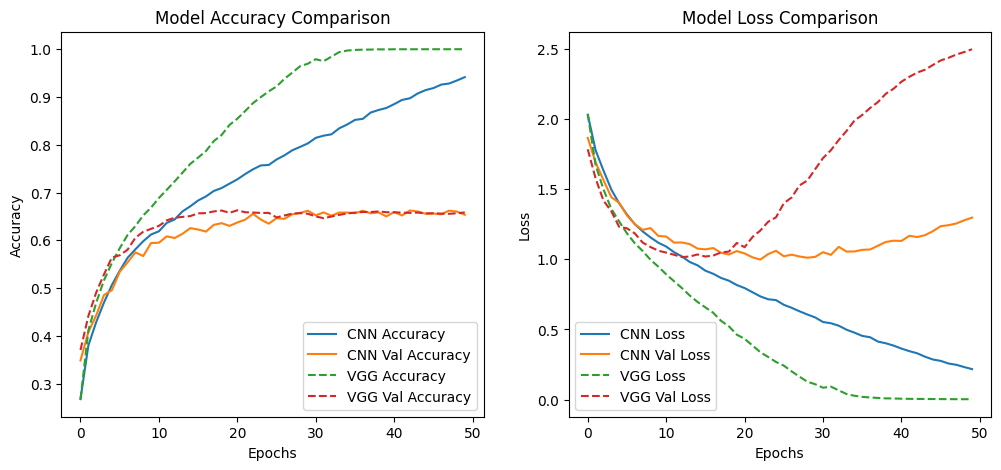

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='CNN Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Val Accuracy')
plt.plot(history_vgg.history['accuracy'], label='VGG Accuracy', linestyle='dashed')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Val Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Comparison')

# Plot loss comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='CNN Loss')
plt.plot(history.history['val_loss'], label='CNN Val Loss')
plt.plot(history_vgg.history['loss'], label='VGG Loss', linestyle='dashed')
plt.plot(history_vgg.history['val_loss'], label='VGG Val Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Comparison')

plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Clear previous session
tf.keras.backend.clear_session()

# Define VGG-like model with 64x64 input
model_vgg_complete = Sequential([
    # First convolutional block: 2 layers with 64 filters
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Second convolutional block: 2 layers with 128 filters
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Third convolutional block: 2 layers with 256 filters
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten and fully connected layers
    Flatten(),
    Dense(128, activation='relu'),

    # Output layer with 10 neurons (softmax for classification)
    Dense(10, activation='softmax')
])

# Model Summary
model_vgg_complete.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [14]:
# Compile the model
model_vgg_complete.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)



## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Limpiar sesiones previas
tf.keras.backend.clear_session()

# Definir el modelo VGG-like con entrada 64x64
model_vgg_complete = Sequential([
    # Primer bloque convolucional
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Segundo bloque convolucional
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Tercer bloque convolucional
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Aplanar y capas densas
    Flatten(),
    Dense(128, activation='relu'),

    # Capa de salida con softmax para clasificación en 10 clases
    Dense(10, activation='softmax')
])

# Mostrar la estructura del modelo
model_vgg_complete.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Limpiar sesiones previas
tf.keras.backend.clear_session()

# Definir el modelo VGG-like con entrada 64x64
model_vgg_complete = Sequential([
    # Primer bloque convolucional
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Segundo bloque convolucional
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Tercer bloque convolucional
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Aplanar y capas densas
    Flatten(),
    Dense(128, activation='relu'),

    # Capa de salida con softmax para clasificación en 10 clases
    Dense(10, activation='softmax')
])

# Mostrar la estructura del modelo
model_vgg_complete.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# ... (rest of your imports and data loading) ...

# Define the VGG-like model with the correct input shape for CIFAR-10
model_vgg_complete = Sequential([
    # ... (your convolutional layers) ...

    # Flatten and fully connected layers
    Flatten(),
    # Recalculating the Dense Layer for 32*32 image size after convolutions : (4*4*256) = 4096
    Dense(4096, activation='relu'),

    # Output layer with 10 neurons (softmax for classification)
    Dense(10, activation='softmax')
])

# ... (rest of your code) ...

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
